In [11]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from yellowbrick.classifier import ClassPredictionError
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

import warnings
warnings.filterwarnings('ignore')



bladder_cancer_file = "/Users/sertan/Documents/DataScience_GT/TheProject/Bladder-Cancer-Detection/BladderC_data.txt"
df = pd.read_csv(bladder_cancer_file, delimiter="\t", header = None, low_memory=False) 





In [12]:
### Data Wrangling 

#Dropping soon to be columns from the dataset
df2 = df.drop([0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34], axis=0) 
df3 = df2.T
df3 = df3.drop([2601], axis=1)
display(df3.head(10))

#Labeling and headers
df3.loc[0, 10] = 'Gender'
df3.loc[0, 11] = 'Age'
df3.loc[0, 12] = 'Class'
df3.loc[0, 13] = 'Path_Stage'
df3.loc[0, 14] = 'Path_Grade'
df3.loc[0, 35] = 'Sample_ID'
#df3.head(10)

new_header = df3.iloc[0] 
df4 = df3[1:] 
df4.columns = new_header 
#df4.head()

df4['Gender']     = df4['Gender'].str.replace('Sex: ', '')
df4['Age']        = df4['Age'].str.replace('age: ', '')
df4['Class']      = df4['Class'].str.replace('disease status: ', '')
df4['Path_Stage'] = df4['Path_Stage'].str.replace('pathological tstage: ', '')
df4['Path_Grade'] = df4['Path_Grade'].str.replace('pathological grade: ', '')
display(df4.head(10))
display(df4.tail())



,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,Bladder Cancer,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,Bladder Cancer,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,Bladder Cancer,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,Bladder Cancer,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,Bladder Cancer,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,Bladder Cancer,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,Bladder Cancer,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,Bladder Cancer,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,Bladder Cancer,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,Bladder Cancer,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
968,Male,56,Sarcoma,uncertain,uncertain,GSM3107823,3.708,0.047,0.047,2.367,...,0.047,0.047,7.018,0.047,0.047,4.981,5.108,0.047,0.047,0.047
969,Male,30,Sarcoma,uncertain,uncertain,GSM3107824,0.132,5.036,2.702,3.014,...,0.132,4.692,7.139,3.550,0.132,6.421,5.440,2.879,0.132,1.333
970,Female,28,Sarcoma,uncertain,uncertain,GSM3107825,5.440,6.437,6.580,4.195,...,6.006,1.825,7.207,7.598,3.817,5.860,7.004,4.843,1.825,5.272
971,Male,60,Sarcoma,uncertain,uncertain,GSM3107826,0.071,4.577,5.210,3.543,...,0.071,0.071,7.237,0.071,0.071,4.031,0.071,6.098,0.071,0.071
972,Male,77,Sarcoma,uncertain,uncertain,GSM3107827,4.798,4.875,5.118,4.896,...,-1.124,3.719,8.208,4.938,-1.183,6.317,5.534,5.347,3.918,4.491


In [13]:
### Data Wrangling 

#Looking at unique values of the columns
df5=df4
display(df5["Gender"].unique())
display(df5["Age"].unique())
display(df5["Class"].unique())
display(df5["Path_Stage"].unique())
display(df5["Path_Grade"].unique())
display(df5['Path_Stage'].value_counts())
display(df5['Path_Grade'].value_counts())

#Replacing missing and miss coded data, catagorizing them into "uncertain"
df6=df5
df6['Path_Stage']=df6['Path_Stage'].str.replace('pathological grade: high','uncertain')
df6['Path_Stage']=df6['Path_Stage'].str.replace('NA','uncertain')
df6['Path_Grade']=df6['Path_Grade'].str.replace('NA','uncertain')
df6['Path_Grade']=df6['Path_Grade'].fillna('uncertain')
display(df6['Path_Stage'].value_counts())
display(df6['Path_Grade'].value_counts())

array(['Male', 'Female'], dtype=object)

array(['59', '77', '50', '76', '81', '54', '74', '58', '65', '71', '66',
       '80', '68', '61', '55', '69', '48', '72', '53', '86', '67', '60',
       '79', '57', '82', '41', '78', '63', '64', '83', '73', '39', '70',
       '35', '84', '44', '85', '62', '56', '42', '87', '52', '38', '93',
       '75', '47', '49', '51', '32', '90', '89', '40', '34', '43', '46',
       '37', '36', '92', '88', '45', '31', '26', '17', '24', '33', '30',
       '27', '29', '28'], dtype=object)

array(['Bladder Cancer', 'Non-cancer control', 'Breast Cancer',
       'Biliary Tract Cancer', 'Colorectal Cancer', 'Esophageal Cancer',
       'Gastric Cancer', 'Glioma', 'Hepatocellular Carcinoma',
       'Lung Cancer', 'Ovarian Cancer', 'Pancreatic Cancer',
       'Prostate Cancer', 'Sarcoma'], dtype=object)

array(['<pT2', '>=pT2', 'pathological grade: high', 'NA', 'uncertain'],
      dtype=object)

array(['low', 'high', nan, 'NA', 'uncertain'], dtype=object)

uncertain                   480
<pT2                        300
NA                          100
>=pT2                        90
pathological grade: high      2
Name: Path_Stage, dtype: int64

uncertain    480
high         313
NA           100
low           77
Name: Path_Grade, dtype: int64

uncertain    582
<pT2         300
>=pT2         90
Name: Path_Stage, dtype: int64

uncertain    582
high         313
low           77
Name: Path_Grade, dtype: int64

In [14]:
### Data Wrangling 

#Dividing the group into 3
df7=df6
display(df7.head(10))
df7["Class"] = df7["Class"].map(lambda x: 1 if x=="Bladder Cancer" else (0 if x=="Non-cancer control" else 2))
display(df7.head(10))
display(df7["Class"].unique())

#Decided to drop them and encode Gender
cols = ["Path_Stage","Path_Grade","Sample_ID"]
df8 = df7.drop(cols,axis=1)
dum = ["Gender"]
df8 = pd.get_dummies(df8, columns=dum)
display(df8.head())



,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,Bladder Cancer,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,Bladder Cancer,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,Bladder Cancer,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,Bladder Cancer,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,Bladder Cancer,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,Bladder Cancer,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,Bladder Cancer,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,Bladder Cancer,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,Bladder Cancer,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,Bladder Cancer,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,1,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,1,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,1,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,1,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,1,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,1,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,1,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,1,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,1,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,1,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


array([1, 0, 2])

,Age,Class,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,...,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,Gender_Female,Gender_Male
1,59,1,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,...,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061,0,1
2,77,1,0.765,0.765,4.920,0.765,0.765,0.765,0.765,0.765,...,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765,1,0
3,50,1,2.949,3.451,0.420,2.594,1.034,-1.492,2.315,1.696,...,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492,0,1
4,76,1,3.033,6.224,3.496,4.870,3.977,0.867,6.365,0.867,...,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042,0,1
5,81,1,4.832,5.349,5.571,6.055,1.237,1.237,4.042,4.588,...,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985,1,0


In [15]:
#Creating X and y, our independent and dependent variables. 
colsdrop=["Class"]
X = df8.drop(colsdrop,axis=1)
y = df8['Class']
display(df8.shape)
display(X.shape)
display(y.shape)
X.head()

(972, 2569)

(972, 2568)

(972,)

,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,...,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,Gender_Female,Gender_Male
1,59,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129,...,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061,0,1
2,77,0.765,0.765,4.920,0.765,0.765,0.765,0.765,0.765,0.765,...,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765,1,0
3,50,2.949,3.451,0.420,2.594,1.034,-1.492,2.315,1.696,-1.492,...,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492,0,1
4,76,3.033,6.224,3.496,4.870,3.977,0.867,6.365,0.867,1.800,...,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042,0,1
5,81,4.832,5.349,5.571,6.055,1.237,1.237,4.042,4.588,4.127,...,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985,1,0


In [16]:
### Splitting Data into Test and Train and Standarizing it

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2, stratify=y)


# Standardizing the features
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
ssc.fit(X_train)
X_std_tr = ssc.transform(X_train)
X_std_te = ssc.transform(X_test)

display(X_std_tr.shape)
display(X_train.iloc[:4,:10])    ## Before standardizing
display(X_std_tr[1,:])           ## After



(680, 2568)

,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070
31,68,1.289,1.289,5.646,6.473,1.289,1.289,1.289,1.289,4.609
252,62,4.900,5.834,5.018,5.708,3.669,6.014,-0.158,4.887,4.363
319,66,0.243,0.243,0.243,4.820,0.243,3.943,1.708,3.566,4.420
13,77,5.898,1.468,1.468,1.468,1.468,1.468,4.948,1.468,6.429


array([-0.19641425,  0.77402209,  1.041428  , ...,  1.83535658,
       -0.75767676,  0.75767676])

In [7]:
##################################################################
#### Choose one of the dimention reduction methods and run it
#### 1) PCA (run this cell) or 2) Random Forrest (run next cell)
#### If you run this cell then skip next and continue. If you 
#### start from the next one then just continue.
###################################################################

### 1) Dimention Reduxtion with PCA

#Keeping 95% of the variation while reducing dimentions. 
#Lower the variation the lower the dimentions.

pca = PCA(.95)
pca.fit(X_std_tr)
X_pc_tr = pca.transform(X_std_tr)
X_pc_te = pca.transform(X_std_te)

display(pca.n_components_)
display(X_pc_tr.shape)

497

(680, 497)

In [17]:
### 2) Dimention Reduction with Random Forest and Select from model

rf2 = SelectFromModel(RandomForestClassifier())
rf2.fit(X_train,y_train)
selected_feat= X_train.columns[(rf2.get_support())]
X_rf_tr = X_train[selected_feat]
X_rf_te = X_test[selected_feat]

display(len(selected_feat))
print(selected_feat)

display(X_rf_tr.iloc[:5,-10:])
display(X_rf_te.iloc[:5,-10:])

X_pc_tr = X_rf_tr
X_pc_te = X_rf_te

391

Index(['MIMAT0000068', 'MIMAT0000069', 'MIMAT0000071', 'MIMAT0000073',
       'MIMAT0000074', 'MIMAT0000076', 'MIMAT0000078', 'MIMAT0000091',
       'MIMAT0000101', 'MIMAT0000227',
       ...
       'MIMAT0030420', 'MIMAT0030422', 'MIMAT0030424', 'MIMAT0030983',
       'MIMAT0030985', 'MIMAT0031000', 'MIMAT0031011', 'MIMAT0031015',
       'MIMAT0031016', 'MIMAT0032029'],
      dtype='object', length=391)


,MIMAT0030420,MIMAT0030422,MIMAT0030424,MIMAT0030983,MIMAT0030985,MIMAT0031000,MIMAT0031011,MIMAT0031015,MIMAT0031016,MIMAT0032029
31,6.524,7.524,1.289,4.884,5.201,9.254,4.332,4.512,7.120,6.001
252,6.908,7.198,-0.158,2.829,-0.158,8.999,-0.158,-0.158,7.299,6.082
319,6.756,7.890,0.243,0.243,4.449,8.978,1.414,3.381,6.556,6.924
13,6.931,7.473,2.424,6.336,7.833,9.421,3.429,6.106,7.569,7.215
829,6.018,6.560,3.911,2.227,1.232,7.835,-1.411,-1.411,6.619,7.815


,MIMAT0030420,MIMAT0030422,MIMAT0030424,MIMAT0030983,MIMAT0030985,MIMAT0031000,MIMAT0031011,MIMAT0031015,MIMAT0031016,MIMAT0032029
541,6.714,6.693,2.960,-1.262,-1.262,8.058,0.531,-1.262,6.158,8.392
369,5.935,8.325,1.307,2.459,3.224,9.743,1.307,3.638,6.322,7.126
496,6.350,7.453,0.658,5.351,4.608,7.440,0.658,4.474,7.259,6.477
234,6.065,6.963,2.480,-1.286,3.485,7.958,-1.286,1.198,6.496,7.288
435,7.298,7.377,-2.413,-2.413,-2.413,6.216,-2.413,-2.413,7.093,7.845


In [18]:
### Now that dimention is reduced try different models

## A) Logistic Regresssion 

  ## check some of the assuptions like, the independent variables should be independent of each other. 
  ## That is, the model should have little or no multicollinearity

  ## https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
  ## https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

lr = LogisticRegression()
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

grid = GridSearchCV(lr, param_grid=param_grid, cv=10)
grid.fit(X_pc_tr, y_train)
display(grid.best_params_)
display(grid.best_score_)

## Confusion matrix and classification report

y_pred = grid.predict(X_pc_te)
display(grid.score(X_pc_te, y_test))
confusion_M = confusion_matrix(y_test, y_pred)
print(confusion_M)
print(classification_report(y_test, y_pred))



{'solver': 'saga'}

0.9323529411764706

0.928082191780822

[[ 29   0   1]
 [  0 113   5]
 [  0  15 129]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.88      0.96      0.92       118
           2       0.96      0.90      0.92       144

   micro avg       0.93      0.93      0.93       292
   macro avg       0.95      0.94      0.94       292
weighted avg       0.93      0.93      0.93       292



In [19]:
### B) K-Neighborhood Classifier

grid_params = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,grid_params,cv=5)
knn_cv.fit(X_pc_tr,y_train)

display(knn_cv.best_params_)
display(knn_cv.best_score_)
            
## Confusion matrix and classification report

y_pred_knn = knn_cv.predict(X_pc_te)
display(knn_cv.score(X_pc_te, y_test))

confusion_M2 = confusion_matrix(y_test, y_pred_knn)
print(confusion_M2)
print(classification_report(y_test, y_pred_knn))

{'n_neighbors': 17}

0.8352941176470589

0.8321917808219178

[[ 21   0   9]
 [  0 113   5]
 [  0  35 109]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        30
           1       0.76      0.96      0.85       118
           2       0.89      0.76      0.82       144

   micro avg       0.83      0.83      0.83       292
   macro avg       0.88      0.80      0.83       292
weighted avg       0.85      0.83      0.83       292



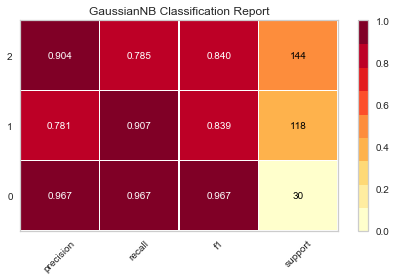

In [20]:
## C) GaussianNB Classifier and visualizer


bayes = GaussianNB()
visualizer = ClassificationReport(bayes, support=True)

visualizer.fit(X_pc_tr, y_train)  # Fit the visualizer and the model
visualizer.score(X_pc_te, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

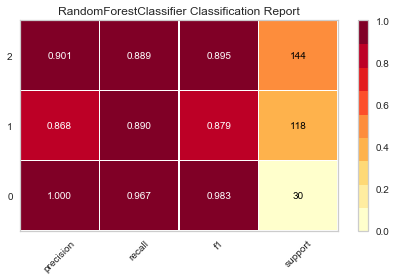

In [21]:
##https://github.com/georgetown-analytics/machine-learning/blob/master/notebook/Wheat%20Classification.ipynb

### D)Random Forest Classifier and visualizer

rf = RandomForestClassifier()
visualizer = ClassificationReport(rf, support=True)  

visualizer.fit(X_train,y_train)  # Fit the visualizer and the model
visualizer.score(X_test,y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data


#rf.fit(X_pc_tr,y_train)
#expected  = y_test
#predicted = rf.predict(X_pc_te)       
#display(metrics.precision_score(expected, predicted, average='weighted'))
#display(metrics.recall_score(expected, predicted,average='weighted'))
#display(metrics.accuracy_score(expected, predicted))
#display(metrics.f1_score(expected, predicted, average='weighted'))



In [ ]:
#ClassPredictionError
#The Yellowbrick ClassPredictionError plot is a twist on other and sometimes more familiar classification model 
#diagnostic tools like the Confusion Matrix and Classification Report. Like the Classification Report, 
#this plot shows the support (number of training samples) for each class in the fitted classification 
#model as a stacked bar chart. Each bar is segmented to show the proportion of predictions 
#(including false negatives and false positives, like a Confusion Matrix) for each class. 
#You can use a ClassPredictionError to visualize which classes your classifier is having a particularly difficult 
#time with, and more importantly, what incorrect answers it is giving on a per-class basis. 
#This can often enable you to better understand strengths and weaknesses of different models and particular 
#challenges unique to your dataset.
#The class prediction error chart provides a way to quickly understand how good 
#your classifier is at predicting the right classes.

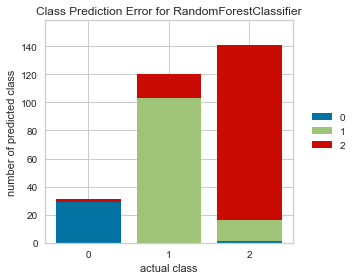

In [22]:
### D)Random Forest Classifier and visualizer 2


visualizer2 = ClassPredictionError(RandomForestClassifier(n_estimators=10))

# Fit the training data to the visualizer
visualizer2.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer2.score(X_test, y_test)

# Draw visualization
visualizer2.poof()

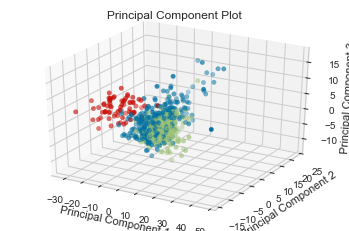

In [23]:
from yellowbrick.features.pca import PCADecomposition

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in y_train]

visualizer = PCADecomposition(scale=True, color=label_color, proj_dim=3)
visualizer.fit(X_pc_tr, y_train)
visualizer.transform(X_pc_tr)
visualizer.poof()

In [ ]:
############ IGNORE STUFF AFTER THIS POINT ################

In [ ]:
##RFE takes too Long with 2500 features###

#from sklearn import linear_model
#from sklearn.feature_selection import RFE

#lr = linear_model.LogisticRegression()
#rfe = RFE(lr)
#rfe.fit(X,y)
#rfe.ranking_[1]
#print(rfe.support_)
#print(rfe.ranking_)

In [29]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import StratifiedKFold
#from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
#cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
#model = MultinomialNB()
#visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
#visualizer.fit(X_pc_tr, y_train)
#visualizer.poof()

In [31]:
### F) Density Based Scan Clustering (DBSCAN)

from sklearn.cluster import DBSCAN

max_dist = 3# max distance between 2 samples to be a cluster
min_samp = 2# smallest size of a cluster
db_model = DBSCAN(eps=max_dist, min_samples=min_samp).fit(X_train)
labels = cluster_scan.labels_ # outliers will be labeled -1

core_samples = np.zero_like(labels,dtype = bool)
core_samples[dbscan.core_sample_indices_] = True




NameError: name 'cluster_scan' is not defined

In [128]:
from sklearn.discriminant_analysis
lda = LDA(n_components=2)
new_features = lda.fit(features, labels).transform(features)
print(new_features)

NameError: name 'LDA' is not defined

In [127]:
new_features[:10]

NameError: name 'new_features' is not defined

(array([317.,  14.,   1.,   3.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([4.08915129e-02, 9.76080768e+00, 1.94807238e+01, 2.92006400e+01,
        3.89205562e+01, 4.86404723e+01, 5.83603885e+01, 6.80803047e+01,
        7.78002209e+01, 8.75201370e+01, 9.72400532e+01]),
 <a list of 10 Patch objects>)

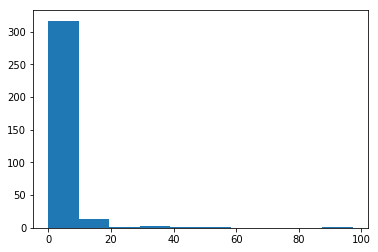

In [340]:
import matplotlib.pyplot as plt 
plt.hist(feat_imps[-338:]*1000)
#plt.boxplot(feat_imps[-775:]*100)